# Example Notebook to Implement Thresholding

In [1]:
from astrolab import imaging as im
import numpy as np
from matplotlib import pyplot as plt
import thresholding as thr

File extension detected as JPG


(4000, 6000)

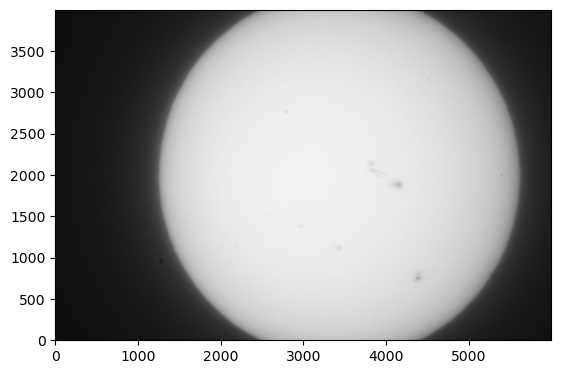

In [2]:
loaded_im = im.load_image("DSC_2367.JPG",print_log=True,stretch="linear")
np.shape(loaded_im)

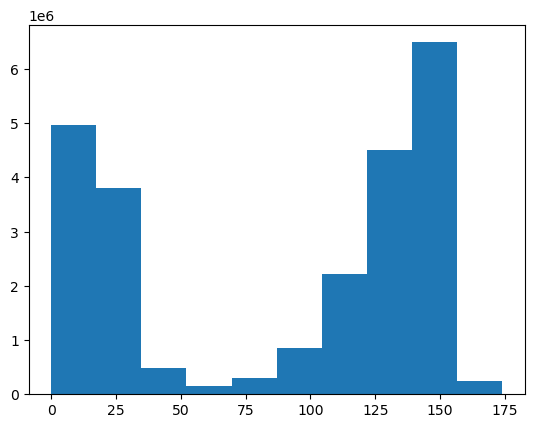

In [3]:
#histogram to find a correct threshold value for sun mask
plt.hist(loaded_im.flatten())
plt.show()

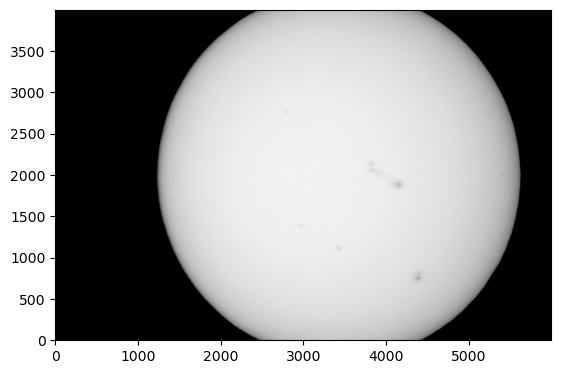

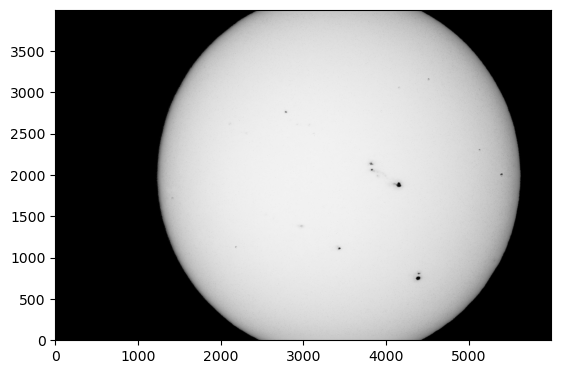

In [4]:
pt=50
sun_thresh = np.where(loaded_im>pt, loaded_im, 0)    # Simple thresholding to remove the background
mask = np.where(loaded_im>pt, True, False)    # Mask to isolate where the sun is
sun_int = thr.integral_im(sun_thresh)    # Calculate the integral image of the background-subtracted image
sunspt = thr.bradleyroth(sun_thresh, sun_int, 100, 10)    # Perform Bradley-roth thresholding on background-subtracted image

im.display(sun_thresh, stretch="linear")
plt.show()
im.display(sunspt, stretch="linear")
plt.show()